             Year  Sales Revenue        Profit  Discount (%)  \
count    50.00000      50.000000     50.000000       50.0000   
mean   2015.84000  279972.280000  44593.680000       18.4048   
std       1.44787  128908.868276  28380.131015        7.3781   
min    2014.00000   65708.000000   6802.000000        5.1300   
25%    2015.00000  160695.250000  17355.750000       12.1050   
50%    2016.00000  280224.000000  42932.000000       19.0650   
75%    2017.00000  399862.750000  66392.250000       24.5675   
max    2018.00000  495299.000000  95735.000000       29.3300   

       Customer Return Rate (%)  Repeat Customers (%)  \
count                 50.000000             50.000000   
mean                  11.042200             27.436400   
std                    5.293619             11.153266   
min                    1.580000             10.580000   
25%                    7.522500             16.930000   
50%                   11.570000             27.455000   
75%                   15

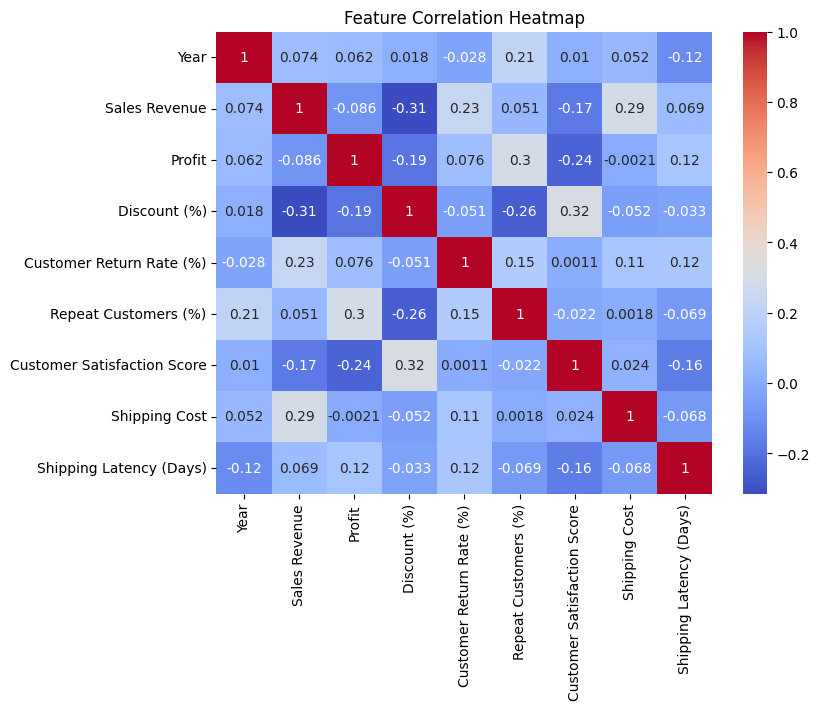

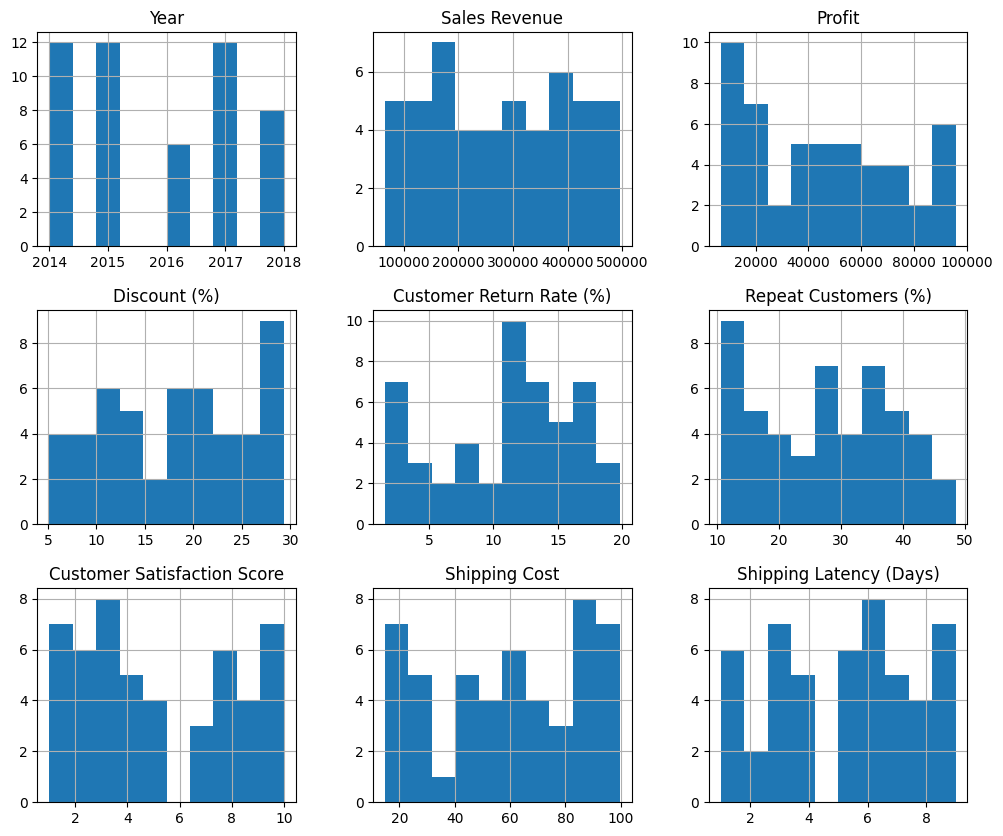

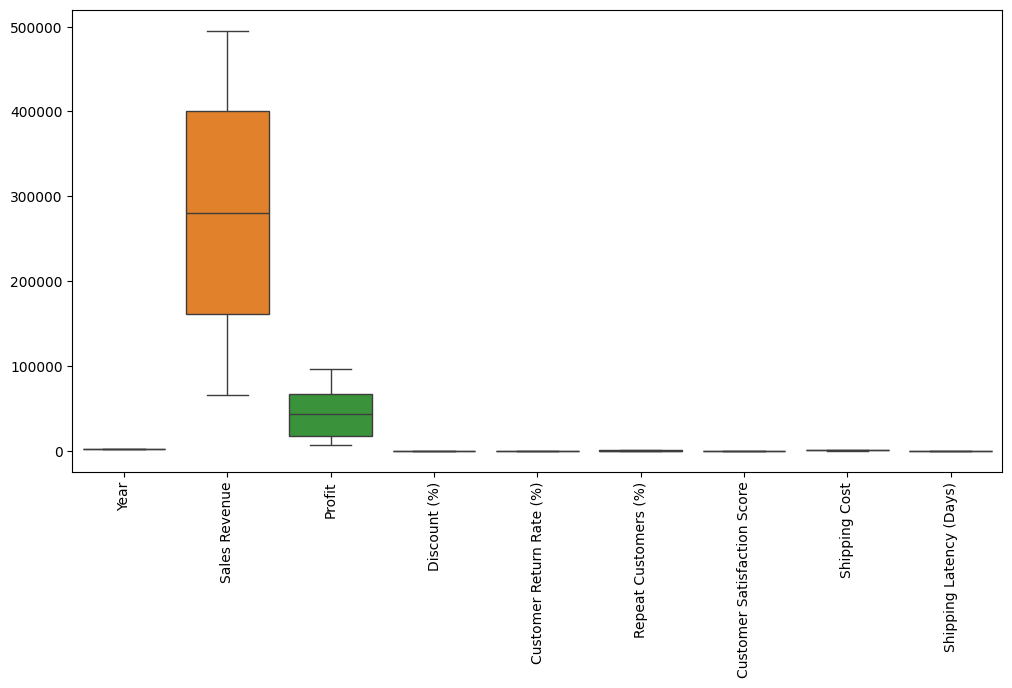

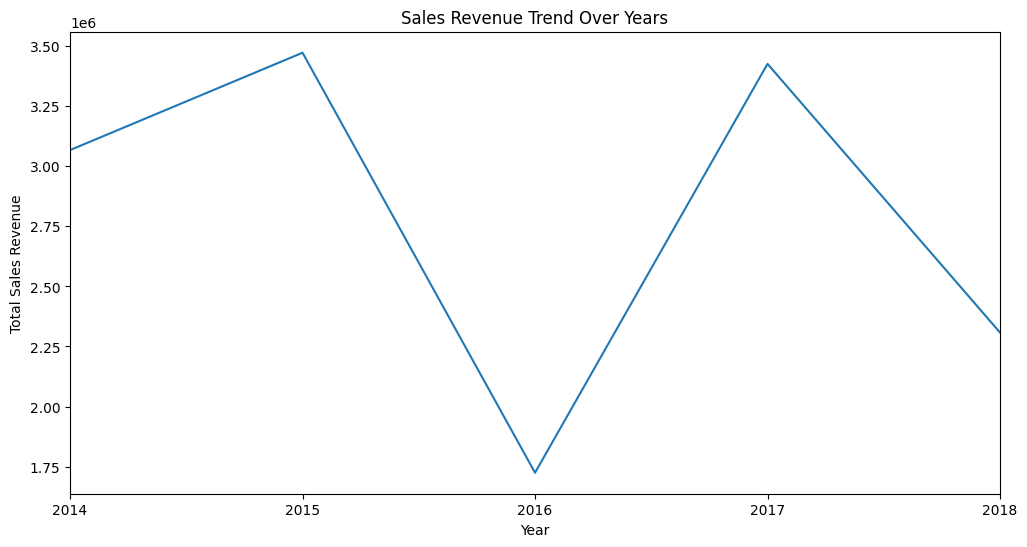

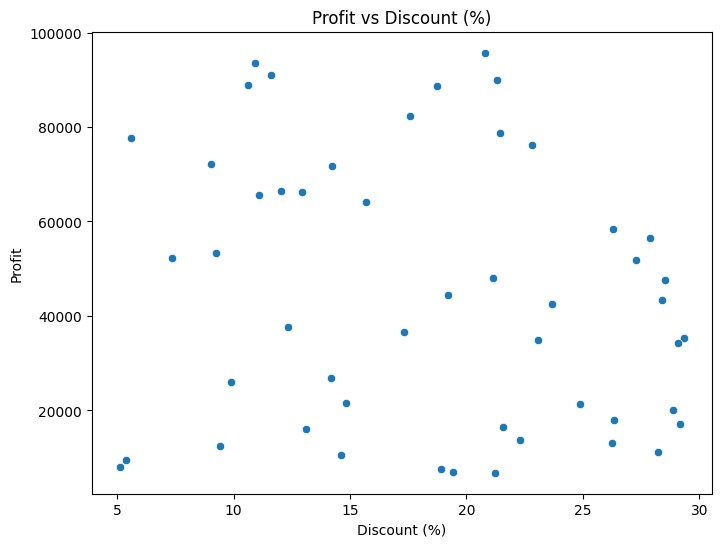

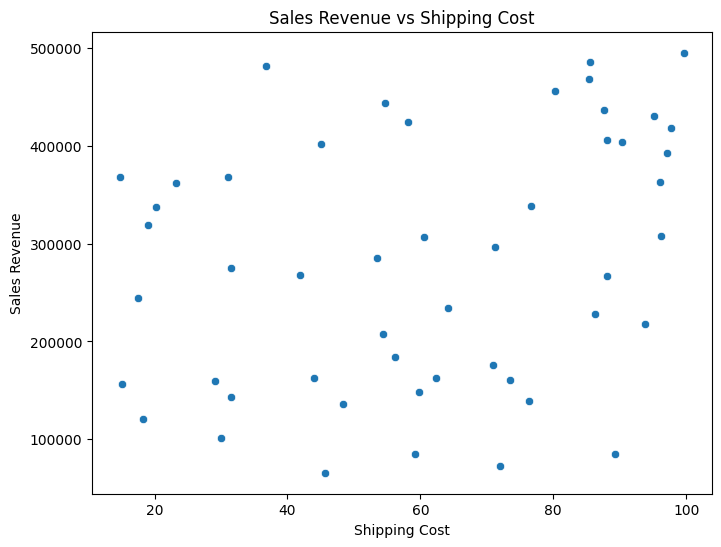

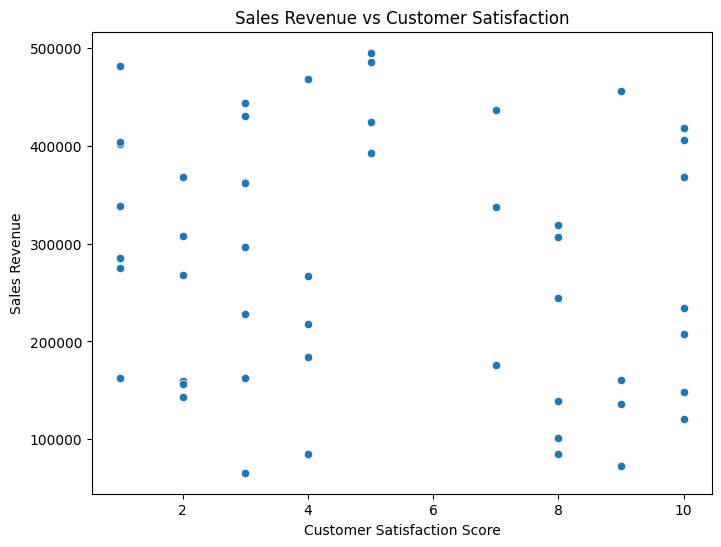

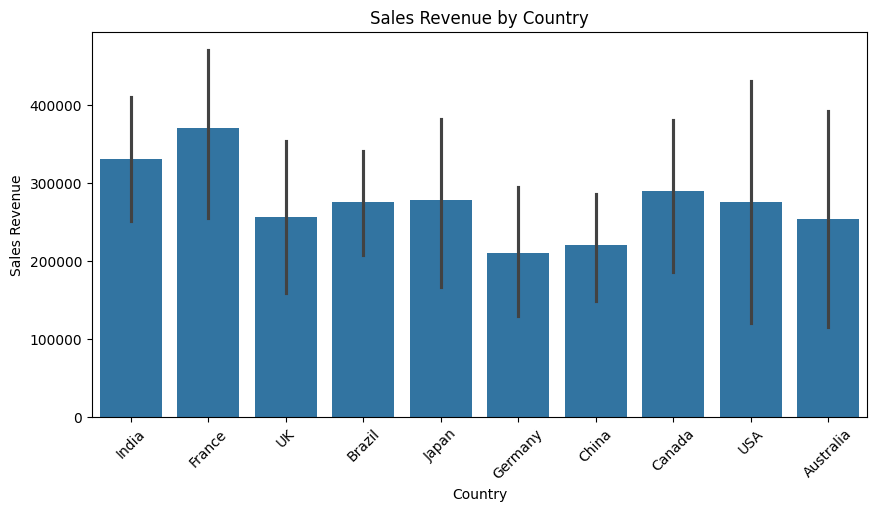

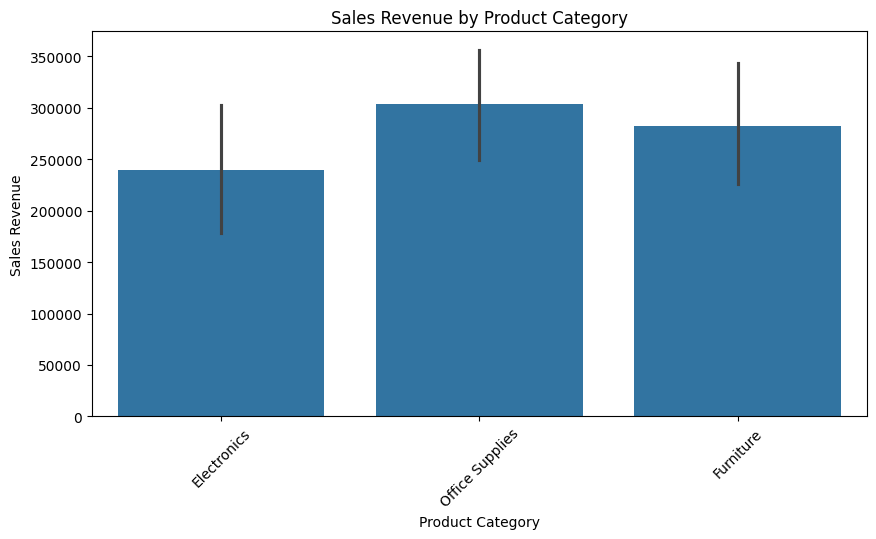

R² Score: 0.09191457909434086
Mean Squared Error: 16888754226.314365


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load Dataset (Replace '/content/global_superstore_data_numeric.csv' with the actual file path)
df = pd.read_csv("/content/global_superstore_data_numeric.csv")

# Data Cleaning
## Handle missing values
# Only calculate median for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
# or
# for col in df.select_dtypes(include=np.number).columns:
#   df[col].fillna(df[col].median(), inplace=True)


## Remove duplicates
df.drop_duplicates(inplace=True)

## Handle outliers using IQR
# Select only numeric columns for outlier handling
numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
# Apply outlier handling only to numeric columns
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Exploratory Data Analysis (EDA)
## Statistical Summary
print(df.describe())

## Correlation Heatmap
# Select only numeric features for correlation calculation
numeric_features = df.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## Histograms
df.hist(figsize=(12,10))
plt.show()

## Boxplots to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Sales Performance Analysis
## Convert Year column to datetime for trend analysis
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

## Time Series Analysis
plt.figure(figsize=(12,6))
df.groupby('Year')['Sales Revenue'].sum().plot()
plt.title("Sales Revenue Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Total Sales Revenue")
plt.show()

## Scatter Plots
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Discount (%)'], y=df['Profit'])
plt.title("Profit vs Discount (%)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Shipping Cost'], y=df['Sales Revenue'])
plt.title("Sales Revenue vs Shipping Cost")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Customer Satisfaction Score'], y=df['Sales Revenue'])
plt.title("Sales Revenue vs Customer Satisfaction")
plt.show()

## Sales Distribution by Country and Product Category
plt.figure(figsize=(10,5))
sns.barplot(x=df['Country'], y=df['Sales Revenue'])
plt.title("Sales Revenue by Country")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=df['Product Category'], y=df['Sales Revenue'])
plt.title("Sales Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

# Predictive Modeling
## Feature Selection
X = df[['Profit', 'Discount (%)', 'Shipping Cost', 'Customer Satisfaction Score', 'Shipping Latency (Days)']]
y = df['Sales Revenue']

## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Model
model = LinearRegression()
model.fit(X_train, y_train)

## Predictions
y_pred = model.predict(X_test)

## Model Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))